In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import optuna

In [2]:
file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/function/xgboost/train.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_train = data.iloc[:, -1]
X_train = data.iloc[:, 1:-1]

file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/function/xgboost/test.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_test = data.iloc[:, -1]
X_test = data.iloc[:, 1:-1]

In [3]:
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.6),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    model = XGBRegressor(**param)
    
    # 使用k折交叉验证
    kf = KFold(n_splits=10, shuffle=True, random_state=99)
    rmse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        rmse_scores.append(rmse_fold)
    
    # 计算交叉验证的平均RMSE
    avg_rmse = np.mean(rmse_scores)
    
    return avg_rmse

In [4]:
# 创建Optuna试验
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-03-20 23:30:12,516] A new study created in memory with name: no-name-0fe64f3d-fa83-46d0-8476-270737e0d9c7
[I 2024-03-20 23:30:14,228] Trial 0 finished with value: 0.7073003609936721 and parameters: {'learning_rate': 0.5859035695022473, 'n_estimators': 390, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 0.04980670447521431, 'subsample': 0.9750985003212248, 'colsample_bytree': 0.7180481873096667}. Best is trial 0 with value: 0.7073003609936721.
[I 2024-03-20 23:30:14,504] Trial 1 finished with value: 0.6799168560545044 and parameters: {'learning_rate': 0.5219952915874985, 'n_estimators': 116, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.26768095045965884, 'subsample': 0.9165089058586364, 'colsample_bytree': 0.8255554544830459}. Best is trial 1 with value: 0.6799168560545044.
[I 2024-03-20 23:30:15,277] Trial 2 finished with value: 0.6944680972386351 and parameters: {'learning_rate': 0.8348192369142985, 'n_estimators': 405, 'max_depth': 2, 'min_child_weight': 5, 'gamma': 0.

[I 2024-03-20 23:30:28,094] Trial 24 finished with value: 0.6922957902836966 and parameters: {'learning_rate': 0.25056034460192517, 'n_estimators': 181, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.01700700098059564, 'subsample': 0.8362430454432915, 'colsample_bytree': 0.8078907685735436}. Best is trial 21 with value: 0.6174152879767173.
[I 2024-03-20 23:30:28,605] Trial 25 finished with value: 0.6503035955075401 and parameters: {'learning_rate': 0.45327840372706063, 'n_estimators': 226, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.11356539947424057, 'subsample': 0.8813902104020512, 'colsample_bytree': 0.6935049595860205}. Best is trial 21 with value: 0.6174152879767173.
[I 2024-03-20 23:30:29,028] Trial 26 finished with value: 0.7425918304889289 and parameters: {'learning_rate': 0.5981362763839126, 'n_estimators': 131, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.042046232999264604, 'subsample': 0.7851713473760922, 'colsample_bytree': 0.7643903810496083}. Best is trial 

[I 2024-03-20 23:30:40,940] Trial 48 finished with value: 0.6144062001802362 and parameters: {'learning_rate': 0.2013136891695741, 'n_estimators': 315, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.3000415492285867, 'subsample': 0.9749300417866488, 'colsample_bytree': 0.6346013010681444}. Best is trial 45 with value: 0.6028262408825941.
[I 2024-03-20 23:30:41,585] Trial 49 finished with value: 0.6245546728094502 and parameters: {'learning_rate': 0.21229601580055293, 'n_estimators': 322, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.3710426239096893, 'subsample': 0.9781625208179555, 'colsample_bytree': 0.6347859314830321}. Best is trial 45 with value: 0.6028262408825941.
[I 2024-03-20 23:30:42,168] Trial 50 finished with value: 0.6160574588025405 and parameters: {'learning_rate': 0.1518142872676771, 'n_estimators': 278, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.29515147081636095, 'subsample': 0.9305443100772142, 'colsample_bytree': 0.6632137766473288}. Best is trial 45 w

[I 2024-03-20 23:30:56,967] Trial 72 finished with value: 0.6202403818146185 and parameters: {'learning_rate': 0.06672758791871627, 'n_estimators': 303, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.37089221684098744, 'subsample': 0.9715994151777845, 'colsample_bytree': 0.9619041011056293}. Best is trial 45 with value: 0.6028262408825941.
[I 2024-03-20 23:30:57,511] Trial 73 finished with value: 0.622757227660654 and parameters: {'learning_rate': 0.11487302972087687, 'n_estimators': 252, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.40494898309476207, 'subsample': 0.9493707966285092, 'colsample_bytree': 0.6002630830055603}. Best is trial 45 with value: 0.6028262408825941.
[I 2024-03-20 23:30:58,202] Trial 74 finished with value: 0.6152756384461532 and parameters: {'learning_rate': 0.032544628573885334, 'n_estimators': 289, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.4451717786661458, 'subsample': 0.9413127396941048, 'colsample_bytree': 0.6706072274509496}. Best is trial 4

[I 2024-03-20 23:31:16,134] Trial 96 finished with value: 0.611233319965744 and parameters: {'learning_rate': 0.11273025903883259, 'n_estimators': 419, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.17170322266268398, 'subsample': 0.9873333280949103, 'colsample_bytree': 0.6118171843002604}. Best is trial 83 with value: 0.5982204867721561.
[I 2024-03-20 23:31:16,948] Trial 97 finished with value: 0.6090976363962668 and parameters: {'learning_rate': 0.09235191445346877, 'n_estimators': 396, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.1422836166703971, 'subsample': 0.9866007635239321, 'colsample_bytree': 0.6230600470190951}. Best is trial 83 with value: 0.5982204867721561.
[I 2024-03-20 23:31:17,776] Trial 98 finished with value: 0.6103754099309404 and parameters: {'learning_rate': 0.0643843774623883, 'n_estimators': 394, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.11727567363427747, 'subsample': 0.9974748866426892, 'colsample_bytree': 0.6247768063587255}. Best is trial 83 

[I 2024-03-20 23:31:41,829] Trial 120 finished with value: 0.6069978667004101 and parameters: {'learning_rate': 0.023466347441636476, 'n_estimators': 452, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.051893331651840555, 'subsample': 0.945146578902024, 'colsample_bytree': 0.6137978160691792}. Best is trial 83 with value: 0.5982204867721561.
[I 2024-03-20 23:31:42,873] Trial 121 finished with value: 0.601997307570774 and parameters: {'learning_rate': 0.06994991715810253, 'n_estimators': 498, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.0858894088167133, 'subsample': 0.958916781952393, 'colsample_bytree': 0.6186038091262023}. Best is trial 83 with value: 0.5982204867721561.
[I 2024-03-20 23:31:43,993] Trial 122 finished with value: 0.6448996396241817 and parameters: {'learning_rate': 0.11129354788648207, 'n_estimators': 499, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.08998653293119022, 'subsample': 0.6993851002330723, 'colsample_bytree': 0.6185560728142815}. Best is trial

[I 2024-03-20 23:32:10,284] Trial 144 finished with value: 0.623428299701487 and parameters: {'learning_rate': 0.0690265467555916, 'n_estimators': 444, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.013706704489674308, 'subsample': 0.9189113164007339, 'colsample_bytree': 0.629668618990823}. Best is trial 127 with value: 0.5977279666234864.
[I 2024-03-20 23:32:11,701] Trial 145 finished with value: 0.6028368311769556 and parameters: {'learning_rate': 0.011345459418831683, 'n_estimators': 467, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.02971189035382121, 'subsample': 0.8917148726830081, 'colsample_bytree': 0.618336967991241}. Best is trial 127 with value: 0.5977279666234864.
[I 2024-03-20 23:32:13,105] Trial 146 finished with value: 0.9929973549452737 and parameters: {'learning_rate': 0.0010630430986245665, 'n_estimators': 466, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.030294885804314796, 'subsample': 0.8922373765282696, 'colsample_bytree': 0.6170279813884767}. Best is 

[I 2024-03-20 23:32:37,648] Trial 168 finished with value: 0.6893283838226846 and parameters: {'learning_rate': 0.6554391493128435, 'n_estimators': 428, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.10319469229649356, 'subsample': 0.9170627717167185, 'colsample_bytree': 0.6502465810756095}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:32:38,512] Trial 169 finished with value: 0.6934309978874007 and parameters: {'learning_rate': 0.7662205886868398, 'n_estimators': 422, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.06694929949119063, 'subsample': 0.9177728149962964, 'colsample_bytree': 0.6675264451884811}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:32:39,474] Trial 170 finished with value: 0.5985097853443658 and parameters: {'learning_rate': 0.046475008931424595, 'n_estimators': 406, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07205220812893104, 'subsample': 0.9313202086025044, 'colsample_bytree': 0.6583569126509546}. Best is tr

[I 2024-03-20 23:33:00,443] Trial 192 finished with value: 0.5981016263883678 and parameters: {'learning_rate': 0.054249923161750646, 'n_estimators': 385, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07747740620701597, 'subsample': 0.919098761537669, 'colsample_bytree': 0.6460027836979585}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:01,472] Trial 193 finished with value: 0.6375348883358842 and parameters: {'learning_rate': 0.06566775198582271, 'n_estimators': 386, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07226897708627203, 'subsample': 0.6162136984579286, 'colsample_bytree': 0.6729286148149355}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:02,593] Trial 194 finished with value: 0.6031580845551732 and parameters: {'learning_rate': 0.033334860548473365, 'n_estimators': 442, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.057579145540201375, 'subsample': 0.9205106222002536, 'colsample_bytree': 0.632570327526161}. Best is 

[I 2024-03-20 23:33:21,792] Trial 216 finished with value: 0.6000942943231042 and parameters: {'learning_rate': 0.0824058754317902, 'n_estimators': 361, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12605273451079016, 'subsample': 0.8752728573244867, 'colsample_bytree': 0.7055990699588791}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:22,611] Trial 217 finished with value: 0.6023743559680397 and parameters: {'learning_rate': 0.07191451584048512, 'n_estimators': 347, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.09652209872873922, 'subsample': 0.8804500652465266, 'colsample_bytree': 0.6969161679493391}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:23,433] Trial 218 finished with value: 0.6082740885946981 and parameters: {'learning_rate': 0.10874343437033221, 'n_estimators': 379, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11159230047516298, 'subsample': 0.8859898626286873, 'colsample_bytree': 0.7202983446818797}. Best is tr

[I 2024-03-20 23:33:41,949] Trial 240 finished with value: 0.6049577717792559 and parameters: {'learning_rate': 0.08540142277409973, 'n_estimators': 329, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13830242249613608, 'subsample': 0.8830032257773496, 'colsample_bytree': 0.6867598601765446}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:42,771] Trial 241 finished with value: 0.5917833868756156 and parameters: {'learning_rate': 0.06875356603207676, 'n_estimators': 362, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11652108962232616, 'subsample': 0.9058197943548612, 'colsample_bytree': 0.6936788119860035}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:33:43,593] Trial 242 finished with value: 0.594196347389029 and parameters: {'learning_rate': 0.07577137771236953, 'n_estimators': 361, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11840500867522084, 'subsample': 0.9044980929642834, 'colsample_bytree': 0.6959234587966936}. Best is tr

[I 2024-03-20 23:34:00,123] Trial 264 finished with value: 0.6571728577884757 and parameters: {'learning_rate': 0.13596742349014798, 'n_estimators': 338, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.1522333775256605, 'subsample': 0.8783684579560932, 'colsample_bytree': 0.7052994912518086}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:34:00,868] Trial 265 finished with value: 0.597226399577464 and parameters: {'learning_rate': 0.14015247782676749, 'n_estimators': 349, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1355585576885936, 'subsample': 0.8974180914574204, 'colsample_bytree': 0.7029785753607536}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:34:01,606] Trial 266 finished with value: 0.6071406001199557 and parameters: {'learning_rate': 0.17437315732704783, 'n_estimators': 356, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1704801574261781, 'subsample': 0.8937401574003623, 'colsample_bytree': 0.6920649618421005}. Best is trial

[I 2024-03-20 23:34:18,600] Trial 288 finished with value: 0.614807730723459 and parameters: {'learning_rate': 0.09811023707025321, 'n_estimators': 385, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.1277896790118573, 'subsample': 0.903059617522443, 'colsample_bytree': 0.7878776115257076}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:34:19,329] Trial 289 finished with value: 0.655699980466864 and parameters: {'learning_rate': 0.5142549082047254, 'n_estimators': 355, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1128628206686698, 'subsample': 0.8887034447125665, 'colsample_bytree': 0.6907615648563896}. Best is trial 166 with value: 0.5901652274827665.
[I 2024-03-20 23:34:20,081] Trial 290 finished with value: 0.6210012546594019 and parameters: {'learning_rate': 0.26372409367970917, 'n_estimators': 365, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13685244344878672, 'subsample': 0.8967572536776524, 'colsample_bytree': 0.7001222412657219}. Best is trial 1

[I 2024-03-20 23:34:36,858] Trial 312 finished with value: 0.5978314125739739 and parameters: {'learning_rate': 0.09580959239882753, 'n_estimators': 334, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11942600957924154, 'subsample': 0.9278035603249407, 'colsample_bytree': 0.727863040940202}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:34:37,653] Trial 313 finished with value: 0.5964663722754994 and parameters: {'learning_rate': 0.07546295344265469, 'n_estimators': 346, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.10961929323523023, 'subsample': 0.9146489709659281, 'colsample_bytree': 0.7232691942035543}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:34:38,501] Trial 314 finished with value: 0.6029653211427587 and parameters: {'learning_rate': 0.03359675412124328, 'n_estimators': 326, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.136084733235777, 'subsample': 0.9182335783913451, 'colsample_bytree': 0.715803176517556}. Best is trial

[I 2024-03-20 23:34:55,167] Trial 336 finished with value: 0.6003874248179981 and parameters: {'learning_rate': 0.09460127236137325, 'n_estimators': 355, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.10448656815456428, 'subsample': 0.9127539064871284, 'colsample_bytree': 0.7010116801064}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:34:55,767] Trial 337 finished with value: 0.6889452248748476 and parameters: {'learning_rate': 0.7315975750137876, 'n_estimators': 282, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1325556263351072, 'subsample': 0.9212589367626491, 'colsample_bytree': 0.7298441604351005}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:34:56,480] Trial 338 finished with value: 0.6118008375997013 and parameters: {'learning_rate': 0.15425189791134428, 'n_estimators': 327, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12388633606833314, 'subsample': 0.8931598264217323, 'colsample_bytree': 0.7135842870685923}. Best is trial 

[I 2024-03-20 23:35:13,721] Trial 360 finished with value: 0.5926934515382739 and parameters: {'learning_rate': 0.06698820866626427, 'n_estimators': 333, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14719335080359333, 'subsample': 0.897050268606164, 'colsample_bytree': 0.7103738220236753}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:14,468] Trial 361 finished with value: 0.594439418568165 and parameters: {'learning_rate': 0.08351969252899878, 'n_estimators': 331, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15742997332974631, 'subsample': 0.9027801449335295, 'colsample_bytree': 0.7127706194002377}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:15,206] Trial 362 finished with value: 0.615859204842866 and parameters: {'learning_rate': 0.06501336847106692, 'n_estimators': 309, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.14551208843517605, 'subsample': 0.8984249888495897, 'colsample_bytree': 0.7216719504370278}. Best is tria

[I 2024-03-20 23:35:31,811] Trial 384 finished with value: 0.5997993316842647 and parameters: {'learning_rate': 0.048760794107048484, 'n_estimators': 342, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1399779538764626, 'subsample': 0.8821123702361611, 'colsample_bytree': 0.6939933556745813}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:32,532] Trial 385 finished with value: 0.5972873768185274 and parameters: {'learning_rate': 0.09012709400237968, 'n_estimators': 318, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1572847574459658, 'subsample': 0.9083611474402068, 'colsample_bytree': 0.7131875627124018}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:33,337] Trial 386 finished with value: 0.591197218511627 and parameters: {'learning_rate': 0.06411693611745146, 'n_estimators': 329, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13621260127857318, 'subsample': 0.8991429400250923, 'colsample_bytree': 0.6739575993335111}. Best is tri

[I 2024-03-20 23:35:50,427] Trial 408 finished with value: 0.9352509210806661 and parameters: {'learning_rate': 0.0021029179228902045, 'n_estimators': 291, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15043309103447827, 'subsample': 0.9293824894353855, 'colsample_bytree': 0.7053764760442498}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:51,213] Trial 409 finished with value: 0.5917897558162608 and parameters: {'learning_rate': 0.08634206034529553, 'n_estimators': 357, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13806388228172725, 'subsample': 0.9190855566867586, 'colsample_bytree': 0.7129064204843025}. Best is trial 293 with value: 0.5866194307208676.
[I 2024-03-20 23:35:51,967] Trial 410 finished with value: 0.5950565050364935 and parameters: {'learning_rate': 0.1368252250924531, 'n_estimators': 354, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14184873843063409, 'subsample': 0.9252307938217588, 'colsample_bytree': 0.7176663324485655}. Best is 

[I 2024-03-20 23:36:07,782] Trial 432 finished with value: 0.5856686048882365 and parameters: {'learning_rate': 0.17738748684328634, 'n_estimators': 339, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1585566995059596, 'subsample': 0.9212419793207546, 'colsample_bytree': 0.7455794029149649}. Best is trial 432 with value: 0.5856686048882365.
[I 2024-03-20 23:36:08,493] Trial 433 finished with value: 0.6208717870031868 and parameters: {'learning_rate': 0.17910547337645147, 'n_estimators': 336, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.17979948464584763, 'subsample': 0.9384723631886728, 'colsample_bytree': 0.7406329381223192}. Best is trial 432 with value: 0.5856686048882365.
[I 2024-03-20 23:36:09,156] Trial 434 finished with value: 0.605439780485235 and parameters: {'learning_rate': 0.22693602528208742, 'n_estimators': 308, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1586633248098719, 'subsample': 0.9229173607730795, 'colsample_bytree': 0.7498265208434773}. Best is tria

[I 2024-03-20 23:36:24,830] Trial 456 finished with value: 0.6021542422523686 and parameters: {'learning_rate': 0.1322002842306414, 'n_estimators': 345, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.16517298009621967, 'subsample': 0.9487730769161132, 'colsample_bytree': 0.722758708612231}. Best is trial 432 with value: 0.5856686048882365.
[I 2024-03-20 23:36:25,521] Trial 457 finished with value: 0.6653494073079861 and parameters: {'learning_rate': 0.4662510160725519, 'n_estimators': 333, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.16194240208145638, 'subsample': 0.9384664777750572, 'colsample_bytree': 0.7094475202464977}. Best is trial 432 with value: 0.5856686048882365.
[I 2024-03-20 23:36:26,269] Trial 458 finished with value: 0.6021520269352643 and parameters: {'learning_rate': 0.13403168133655596, 'n_estimators': 350, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.17423926800034745, 'subsample': 0.9176034017826984, 'colsample_bytree': 0.7439306516189835}. Best is tria

[I 2024-03-20 23:36:41,371] Trial 480 finished with value: 0.6119968269571117 and parameters: {'learning_rate': 0.16456838722199515, 'n_estimators': 337, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.14375286865240514, 'subsample': 0.9368859443080253, 'colsample_bytree': 0.7192268273377576}. Best is trial 462 with value: 0.5826367601718476.
[I 2024-03-20 23:36:42,072] Trial 481 finished with value: 0.6561890512899493 and parameters: {'learning_rate': 0.20899659724869024, 'n_estimators': 327, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.1748451610953533, 'subsample': 0.921194966744783, 'colsample_bytree': 0.7269988240064987}. Best is trial 462 with value: 0.5826367601718476.
[I 2024-03-20 23:36:42,825] Trial 482 finished with value: 0.6397846207568045 and parameters: {'learning_rate': 0.1355694035774954, 'n_estimators': 345, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.1652684634684648, 'subsample': 0.9275934545681382, 'colsample_bytree': 0.9933827813530911}. Best is trial

[I 2024-03-20 23:36:57,788] Trial 504 finished with value: 0.6214450588627074 and parameters: {'learning_rate': 0.33193162195273895, 'n_estimators': 316, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16063092595816642, 'subsample': 0.927776875475622, 'colsample_bytree': 0.7476403404966826}. Best is trial 490 with value: 0.5805055211815997.
[I 2024-03-20 23:36:58,378] Trial 505 finished with value: 0.6056537218248013 and parameters: {'learning_rate': 0.19014876716220067, 'n_estimators': 258, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14696620187308027, 'subsample': 0.9434748380299319, 'colsample_bytree': 0.7722069247348949}. Best is trial 490 with value: 0.5805055211815997.
[I 2024-03-20 23:36:59,045] Trial 506 finished with value: 0.631265510449422 and parameters: {'learning_rate': 0.2112269885651991, 'n_estimators': 306, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.15846560795059164, 'subsample': 0.9340753646192013, 'colsample_bytree': 0.7579870668974221}. Best is tria

[I 2024-03-20 23:37:14,118] Trial 528 finished with value: 0.6232623151303603 and parameters: {'learning_rate': 0.1813481751935613, 'n_estimators': 338, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.5699341552818977, 'subsample': 0.9315664891070453, 'colsample_bytree': 0.7517366005485449}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:14,829] Trial 529 finished with value: 0.6069819708644831 and parameters: {'learning_rate': 0.1523786955142878, 'n_estimators': 329, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.16995057419628226, 'subsample': 0.9175180164819904, 'colsample_bytree': 0.7937578049366941}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:15,553] Trial 530 finished with value: 0.6190959000311781 and parameters: {'learning_rate': 0.23477824396143498, 'n_estimators': 323, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.20977227944079607, 'subsample': 0.6626012315077854, 'colsample_bytree': 0.7558044892998492}. Best is tria

[I 2024-03-20 23:37:31,258] Trial 552 finished with value: 0.6158292552267215 and parameters: {'learning_rate': 0.12308143503064631, 'n_estimators': 324, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1457082446226155, 'subsample': 0.7267849233460904, 'colsample_bytree': 0.7487133540354819}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:31,983] Trial 553 finished with value: 0.6141242258379642 and parameters: {'learning_rate': 0.14657905504389107, 'n_estimators': 350, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.41396105226577684, 'subsample': 0.9435542773049925, 'colsample_bytree': 0.7345133822842}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:32,530] Trial 554 finished with value: 0.5952644992789285 and parameters: {'learning_rate': 0.1852489928063601, 'n_estimators': 214, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16439401266686826, 'subsample': 0.9148894422436232, 'colsample_bytree': 0.7477380830666829}. Best is trial 

[I 2024-03-20 23:37:48,240] Trial 576 finished with value: 0.5976695963264083 and parameters: {'learning_rate': 0.1975582705626952, 'n_estimators': 352, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15954452177207332, 'subsample': 0.9242974794937326, 'colsample_bytree': 0.7626468340822289}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:48,705] Trial 577 finished with value: 0.6190703700183542 and parameters: {'learning_rate': 0.14926227866674252, 'n_estimators': 160, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1451688219218782, 'subsample': 0.8247735950864857, 'colsample_bytree': 0.7527940284421839}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:37:49,406] Trial 578 finished with value: 0.596846724427047 and parameters: {'learning_rate': 0.174766323888133, 'n_estimators': 322, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16742012388125185, 'subsample': 0.9118007753832579, 'colsample_bytree': 0.7717835434655771}. Best is trial 

[I 2024-03-20 23:38:04,979] Trial 600 finished with value: 0.6257301168597559 and parameters: {'learning_rate': 0.1787898785603138, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.2909921616057154, 'subsample': 0.9379300115401858, 'colsample_bytree': 0.7524492517309227}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:05,707] Trial 601 finished with value: 0.6160390758545613 and parameters: {'learning_rate': 0.21694854071213146, 'n_estimators': 347, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.19667726043441697, 'subsample': 0.9309844272664207, 'colsample_bytree': 0.7417113131313635}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:06,439] Trial 602 finished with value: 0.6015525907179304 and parameters: {'learning_rate': 0.14788287811585585, 'n_estimators': 337, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.1715986512130735, 'subsample': 0.9215294771980295, 'colsample_bytree': 0.7573382435511625}. Best is tria

[I 2024-03-20 23:38:22,273] Trial 624 finished with value: 0.6020301701591815 and parameters: {'learning_rate': 0.12017158428092098, 'n_estimators': 343, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15022679367215508, 'subsample': 0.9164764977972275, 'colsample_bytree': 0.7507779863603598}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:22,952] Trial 625 finished with value: 0.6117642527099834 and parameters: {'learning_rate': 0.14762064227115068, 'n_estimators': 303, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.17120017732475698, 'subsample': 0.9105593384821316, 'colsample_bytree': 0.759533551950611}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:23,656] Trial 626 finished with value: 0.5923919081183779 and parameters: {'learning_rate': 0.16545460796766046, 'n_estimators': 320, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14042186767908063, 'subsample': 0.9332005036232232, 'colsample_bytree': 0.7431388560023938}. Best is tr

[I 2024-03-20 23:38:39,762] Trial 648 finished with value: 0.604067521375355 and parameters: {'learning_rate': 0.1815865501992218, 'n_estimators': 357, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.1623418887886203, 'subsample': 0.9353331626881282, 'colsample_bytree': 0.7328923477594208}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:40,471] Trial 649 finished with value: 0.6324035679002075 and parameters: {'learning_rate': 0.1599459887030119, 'n_estimators': 336, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.44848045699598155, 'subsample': 0.9261945634571472, 'colsample_bytree': 0.7721217732555696}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:40,868] Trial 650 finished with value: 0.6062364069632091 and parameters: {'learning_rate': 0.1350867486060738, 'n_estimators': 129, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.18586723513857945, 'subsample': 0.9170102648327909, 'colsample_bytree': 0.7572949406730802}. Best is trial 

[I 2024-03-20 23:38:56,373] Trial 672 finished with value: 0.6093190384895207 and parameters: {'learning_rate': 0.24549697617127694, 'n_estimators': 311, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.158695235466675, 'subsample': 0.9167158134011468, 'colsample_bytree': 0.7395352255117399}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:57,057] Trial 673 finished with value: 0.5987795765194595 and parameters: {'learning_rate': 0.1671155947787622, 'n_estimators': 304, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12896421693306648, 'subsample': 0.9223520729244022, 'colsample_bytree': 0.7751704317018495}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:38:57,704] Trial 674 finished with value: 0.5967237774556775 and parameters: {'learning_rate': 0.14838768051158255, 'n_estimators': 281, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16663729419681095, 'subsample': 0.9066428023244674, 'colsample_bytree': 0.749342928615833}. Best is trial

[I 2024-03-20 23:39:13,233] Trial 696 finished with value: 0.5959432156748555 and parameters: {'learning_rate': 0.169400976214885, 'n_estimators': 315, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16932840015236106, 'subsample': 0.9467468584632422, 'colsample_bytree': 0.7616492267618161}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:13,964] Trial 697 finished with value: 0.6249719761245649 and parameters: {'learning_rate': 0.1304426599208812, 'n_estimators': 327, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.15042687461296278, 'subsample': 0.921626803202361, 'colsample_bytree': 0.789686866001162}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:14,690] Trial 698 finished with value: 0.6045028574983113 and parameters: {'learning_rate': 0.21344279063186, 'n_estimators': 333, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13377059334248365, 'subsample': 0.9071954100720041, 'colsample_bytree': 0.7446500379697514}. Best is trial 509

[I 2024-03-20 23:39:30,265] Trial 720 finished with value: 0.6006940773831102 and parameters: {'learning_rate': 0.11962274159110592, 'n_estimators': 331, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15054416156985043, 'subsample': 0.9590956741396625, 'colsample_bytree': 0.7295847165093626}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:30,962] Trial 721 finished with value: 0.6178465335999228 and parameters: {'learning_rate': 0.16755888579921094, 'n_estimators': 311, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.16263609540077797, 'subsample': 0.9109575522401473, 'colsample_bytree': 0.7654324688644992}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:31,671] Trial 722 finished with value: 0.6006364526067676 and parameters: {'learning_rate': 0.21620762130132692, 'n_estimators': 323, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14371357519816574, 'subsample': 0.9253586641017973, 'colsample_bytree': 0.7408274760995516}. Best is t

[I 2024-03-20 23:39:47,013] Trial 744 finished with value: 0.5851011802902264 and parameters: {'learning_rate': 0.17160629196500882, 'n_estimators': 278, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15608851797165826, 'subsample': 0.9242933082430662, 'colsample_bytree': 0.7338131298078571}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:47,651] Trial 745 finished with value: 0.6168475959901716 and parameters: {'learning_rate': 0.21999356954977348, 'n_estimators': 281, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15034787419794735, 'subsample': 0.9466864436109523, 'colsample_bytree': 0.7226151351547278}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:39:48,297] Trial 746 finished with value: 0.5963961214698097 and parameters: {'learning_rate': 0.1071909532515895, 'n_estimators': 260, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12998424524893026, 'subsample': 0.9112184413099528, 'colsample_bytree': 0.7335199371546176}. Best is tr

[I 2024-03-20 23:40:03,271] Trial 768 finished with value: 0.5914373411104628 and parameters: {'learning_rate': 0.1443505166933452, 'n_estimators': 248, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16086645726147997, 'subsample': 0.9208102948625795, 'colsample_bytree': 0.7536032613262803}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:03,995] Trial 769 finished with value: 0.5880965011452689 and parameters: {'learning_rate': 0.12322920962633802, 'n_estimators': 316, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13700999543769057, 'subsample': 0.9102228689557976, 'colsample_bytree': 0.7391435405103153}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:04,710] Trial 770 finished with value: 0.5963350992421151 and parameters: {'learning_rate': 0.12145976540712483, 'n_estimators': 302, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11531886969079874, 'subsample': 0.9130953512914922, 'colsample_bytree': 0.7399986011378337}. Best is tr

[I 2024-03-20 23:40:20,245] Trial 792 finished with value: 0.607463541718668 and parameters: {'learning_rate': 0.12141836115133783, 'n_estimators': 312, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.17659719554927716, 'subsample': 0.9363789829855041, 'colsample_bytree': 0.7401140478483099}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:20,982] Trial 793 finished with value: 0.6054315544767388 and parameters: {'learning_rate': 0.10021369112973168, 'n_estimators': 323, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.16277322052733698, 'subsample': 0.9150256555584741, 'colsample_bytree': 0.803365478328195}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:21,729] Trial 794 finished with value: 0.6039244760004693 and parameters: {'learning_rate': 0.14143831368060927, 'n_estimators': 334, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.14553131716185455, 'subsample': 0.9290035791192804, 'colsample_bytree': 0.7471835590513661}. Best is tri

[I 2024-03-20 23:40:37,884] Trial 816 finished with value: 0.6078491771556043 and parameters: {'learning_rate': 0.15430767728307115, 'n_estimators': 342, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11544769233255699, 'subsample': 0.8953663747487315, 'colsample_bytree': 0.7162124863337643}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:38,674] Trial 817 finished with value: 0.6267154542663584 and parameters: {'learning_rate': 0.1676038142689372, 'n_estimators': 352, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.12555866294001033, 'subsample': 0.9060909022061396, 'colsample_bytree': 0.7327454520393366}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:39,394] Trial 818 finished with value: 0.6162066725718867 and parameters: {'learning_rate': 0.1902755380060459, 'n_estimators': 335, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.37775863310211694, 'subsample': 0.9077816238603821, 'colsample_bytree': 0.7202383216128185}. Best is tri

[I 2024-03-20 23:40:55,997] Trial 840 finished with value: 0.6957752461015547 and parameters: {'learning_rate': 0.7604188493932174, 'n_estimators': 356, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.10612965560779958, 'subsample': 0.9071760598917735, 'colsample_bytree': 0.7255155397850869}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:56,788] Trial 841 finished with value: 0.6029153281125497 and parameters: {'learning_rate': 0.11489903392961062, 'n_estimators': 344, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14921529512924867, 'subsample': 0.9067958509789222, 'colsample_bytree': 0.7434101479794716}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:40:57,538] Trial 842 finished with value: 0.6414642375503844 and parameters: {'learning_rate': 0.2820517016732488, 'n_estimators': 342, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.13325689646204425, 'subsample': 0.8920518198266271, 'colsample_bytree': 0.7365383103189418}. Best is tri

[I 2024-03-20 23:41:14,138] Trial 864 finished with value: 0.6090849891765986 and parameters: {'learning_rate': 0.2194653354012926, 'n_estimators': 324, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12227043252320892, 'subsample': 0.9523256347866687, 'colsample_bytree': 0.761255939119478}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:14,860] Trial 865 finished with value: 0.603382153908079 and parameters: {'learning_rate': 0.197041061268067, 'n_estimators': 326, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.09589931458113501, 'subsample': 0.9633595763614826, 'colsample_bytree': 0.7757223921074602}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:15,595] Trial 866 finished with value: 0.6019471337737979 and parameters: {'learning_rate': 0.17638766200795913, 'n_estimators': 327, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.10343292214365299, 'subsample': 0.9480537912306907, 'colsample_bytree': 0.7585531877191743}. Best is trial 

[I 2024-03-20 23:41:30,867] Trial 888 finished with value: 0.6254634333051527 and parameters: {'learning_rate': 0.14144450238448544, 'n_estimators': 285, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.07072410863092936, 'subsample': 0.9458379301187002, 'colsample_bytree': 0.7300665870725475}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:31,564] Trial 889 finished with value: 0.6203419089978863 and parameters: {'learning_rate': 0.1320276666160176, 'n_estimators': 291, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.10056984155097085, 'subsample': 0.930418737998453, 'colsample_bytree': 0.7306075917481047}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:32,227] Trial 890 finished with value: 0.5961778917613143 and parameters: {'learning_rate': 0.14983153033073585, 'n_estimators': 281, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.11724123478007269, 'subsample': 0.9369606720366102, 'colsample_bytree': 0.7248365022823106}. Best is tri

[I 2024-03-20 23:41:47,944] Trial 912 finished with value: 0.6197695111919359 and parameters: {'learning_rate': 0.21924269217987197, 'n_estimators': 310, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13130782938799326, 'subsample': 0.9414214419209733, 'colsample_bytree': 0.7375112135588242}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:48,650] Trial 913 finished with value: 0.6038912585475944 and parameters: {'learning_rate': 0.11647259083468925, 'n_estimators': 302, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13580265134616917, 'subsample': 0.9579791866263703, 'colsample_bytree': 0.7459194015106206}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:41:49,370] Trial 914 finished with value: 0.5956965741848139 and parameters: {'learning_rate': 0.15335740145077337, 'n_estimators': 313, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11045887797624017, 'subsample': 0.9331566264624978, 'colsample_bytree': 0.734430370442959}. Best is tr

[I 2024-03-20 23:42:04,430] Trial 936 finished with value: 0.5959022376019959 and parameters: {'learning_rate': 0.12837500579402897, 'n_estimators': 270, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.11354573088978703, 'subsample': 0.9242749463535415, 'colsample_bytree': 0.7511404640403211}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:05,165] Trial 937 finished with value: 0.6040648834775414 and parameters: {'learning_rate': 0.09881758875711986, 'n_estimators': 315, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.2942300089902648, 'subsample': 0.9461935309092139, 'colsample_bytree': 0.7389514839828679}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:05,901] Trial 938 finished with value: 0.6063126305050851 and parameters: {'learning_rate': 0.19130961938409807, 'n_estimators': 319, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.07679363675541942, 'subsample': 0.9359177131583375, 'colsample_bytree': 0.7629696795996301}. Best is tr

[I 2024-03-20 23:42:21,499] Trial 960 finished with value: 0.6431274516007202 and parameters: {'learning_rate': 0.09700347747573808, 'n_estimators': 343, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.14291590979616375, 'subsample': 0.9161815755208584, 'colsample_bytree': 0.7523588721192503}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:22,242] Trial 961 finished with value: 0.5884345998156498 and parameters: {'learning_rate': 0.17430444485742008, 'n_estimators': 312, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.09186634004494809, 'subsample': 0.9256114239031468, 'colsample_bytree': 0.7241044865484356}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:22,971] Trial 962 finished with value: 0.6071566829199129 and parameters: {'learning_rate': 0.12375144555584479, 'n_estimators': 299, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.08289798923731242, 'subsample': 0.9155162274445309, 'colsample_bytree': 0.7080495936523424}. Best is t

[I 2024-03-20 23:42:38,447] Trial 984 finished with value: 0.6056121749687272 and parameters: {'learning_rate': 0.11890627809096893, 'n_estimators': 326, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.2551571503184163, 'subsample': 0.9111981575843492, 'colsample_bytree': 0.7063233576301988}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:39,218] Trial 985 finished with value: 0.5948363279932061 and parameters: {'learning_rate': 0.13152589926585925, 'n_estimators': 339, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.13350486527154592, 'subsample': 0.9054107746363902, 'colsample_bytree': 0.7184947453354601}. Best is trial 509 with value: 0.5795162795938995.
[I 2024-03-20 23:42:40,013] Trial 986 finished with value: 0.5932250523313862 and parameters: {'learning_rate': 0.12300216748272169, 'n_estimators': 350, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.12977451531481848, 'subsample': 0.9068841341494018, 'colsample_bytree': 0.7102740725193711}. Best is tr

In [5]:
# 获取最佳超参数
best_params = study.best_params
print("最佳超参数组合：", best_params)

最佳超参数组合： {'learning_rate': 0.15085964287459494, 'n_estimators': 321, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.14244426095882456, 'subsample': 0.9253472046755086, 'colsample_bytree': 0.7565742428112372}


In [6]:
# 使用最佳超参数训练模型  
best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7565742428112372, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.14244426095882456,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15085964287459494,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=321, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# 预测训练集和测试集数据  
y_train_pred = best_xgb_reg.predict(X_train)  
y_test_pred = best_xgb_reg.predict(X_test)  

In [8]:
# 计算训练集和测试集的均方根误差 (RMSE) 和决定系数 (R2)  
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  

In [9]:
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  

In [10]:
# 输出 RMSE 和 R2  
print("训练集的均方根误差 (RMSE)：", train_rmse)  
print("测试集的均方根误差 (RMSE)：", test_rmse)  
print("训练集的决定系数 (R2)：", train_r2)  
print("测试集的决定系数 (R2)：", test_r2)

训练集的均方根误差 (RMSE)： 0.32161261854245266
测试集的均方根误差 (RMSE)： 0.5677567547986948
训练集的决定系数 (R2)： 0.9396909717395184
测试集的决定系数 (R2)： 0.8317852921057162


In [11]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
# 计算MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'MAPE (Training): {mape_train}')
print(f'MAPE (Testing): {mape_test}')

MAPE (Training): 0.027534022739959092
MAPE (Testing): 0.058350967491922964


In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=99)
# 执行5次交叉验证
mse_scores = cross_val_score(best_xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# 将负MSE转换为RMSE
rmse_scores = np.sqrt(-mse_scores)

# 输出每次交叉验证的RMSE
print("10次交叉验证的RMSE：", rmse_scores)

# 输出5次交叉验证的平均RMSE
print("平均RMSE：", np.mean(rmse_scores))

10次交叉验证的RMSE： [0.52369795 0.59859933 0.5309824  0.47400118 0.62550881 0.67090089
 0.63703592 0.53550535 0.44982495 0.73462865]
平均RMSE： 0.5780685436134115


[19:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


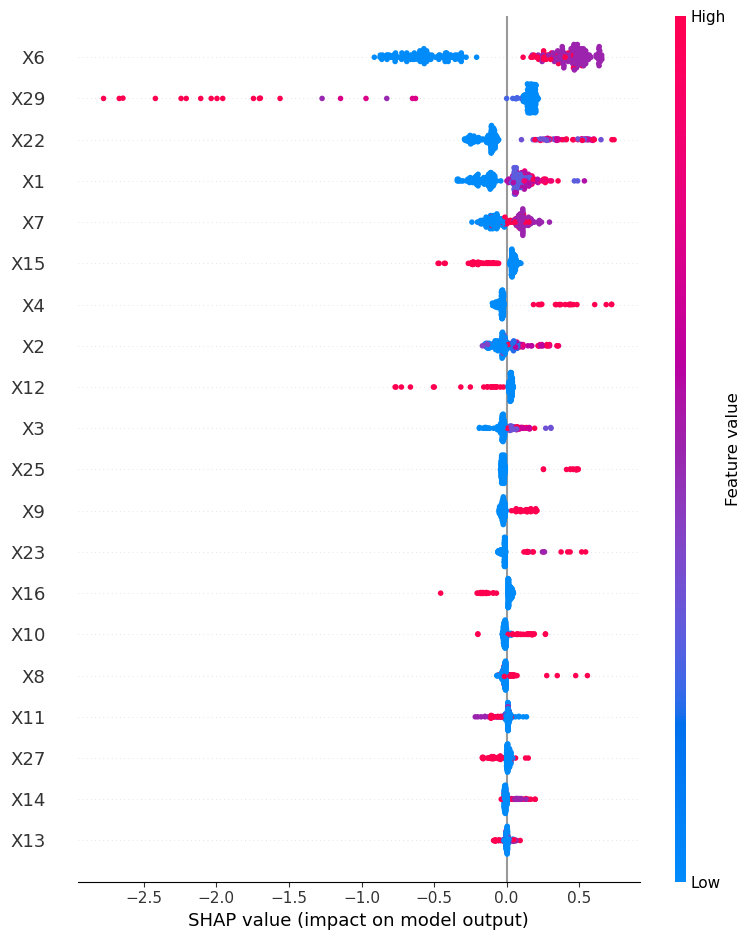

In [14]:
import shap
import matplotlib.pyplot as plt

# 合并 X_train 和 y_train
data = pd.concat([X_train, X_test])

# 创建SHAP解释器对象
explainer = shap.TreeExplainer(best_xgb_reg)

# 获取SHAP值
shap_values = explainer.shap_values(data)

# 可视化SHAP值
shap.summary_plot(shap_values, data)
plt.rcParams['figure.dpi']=600

# 显示可视化图
plt.show()


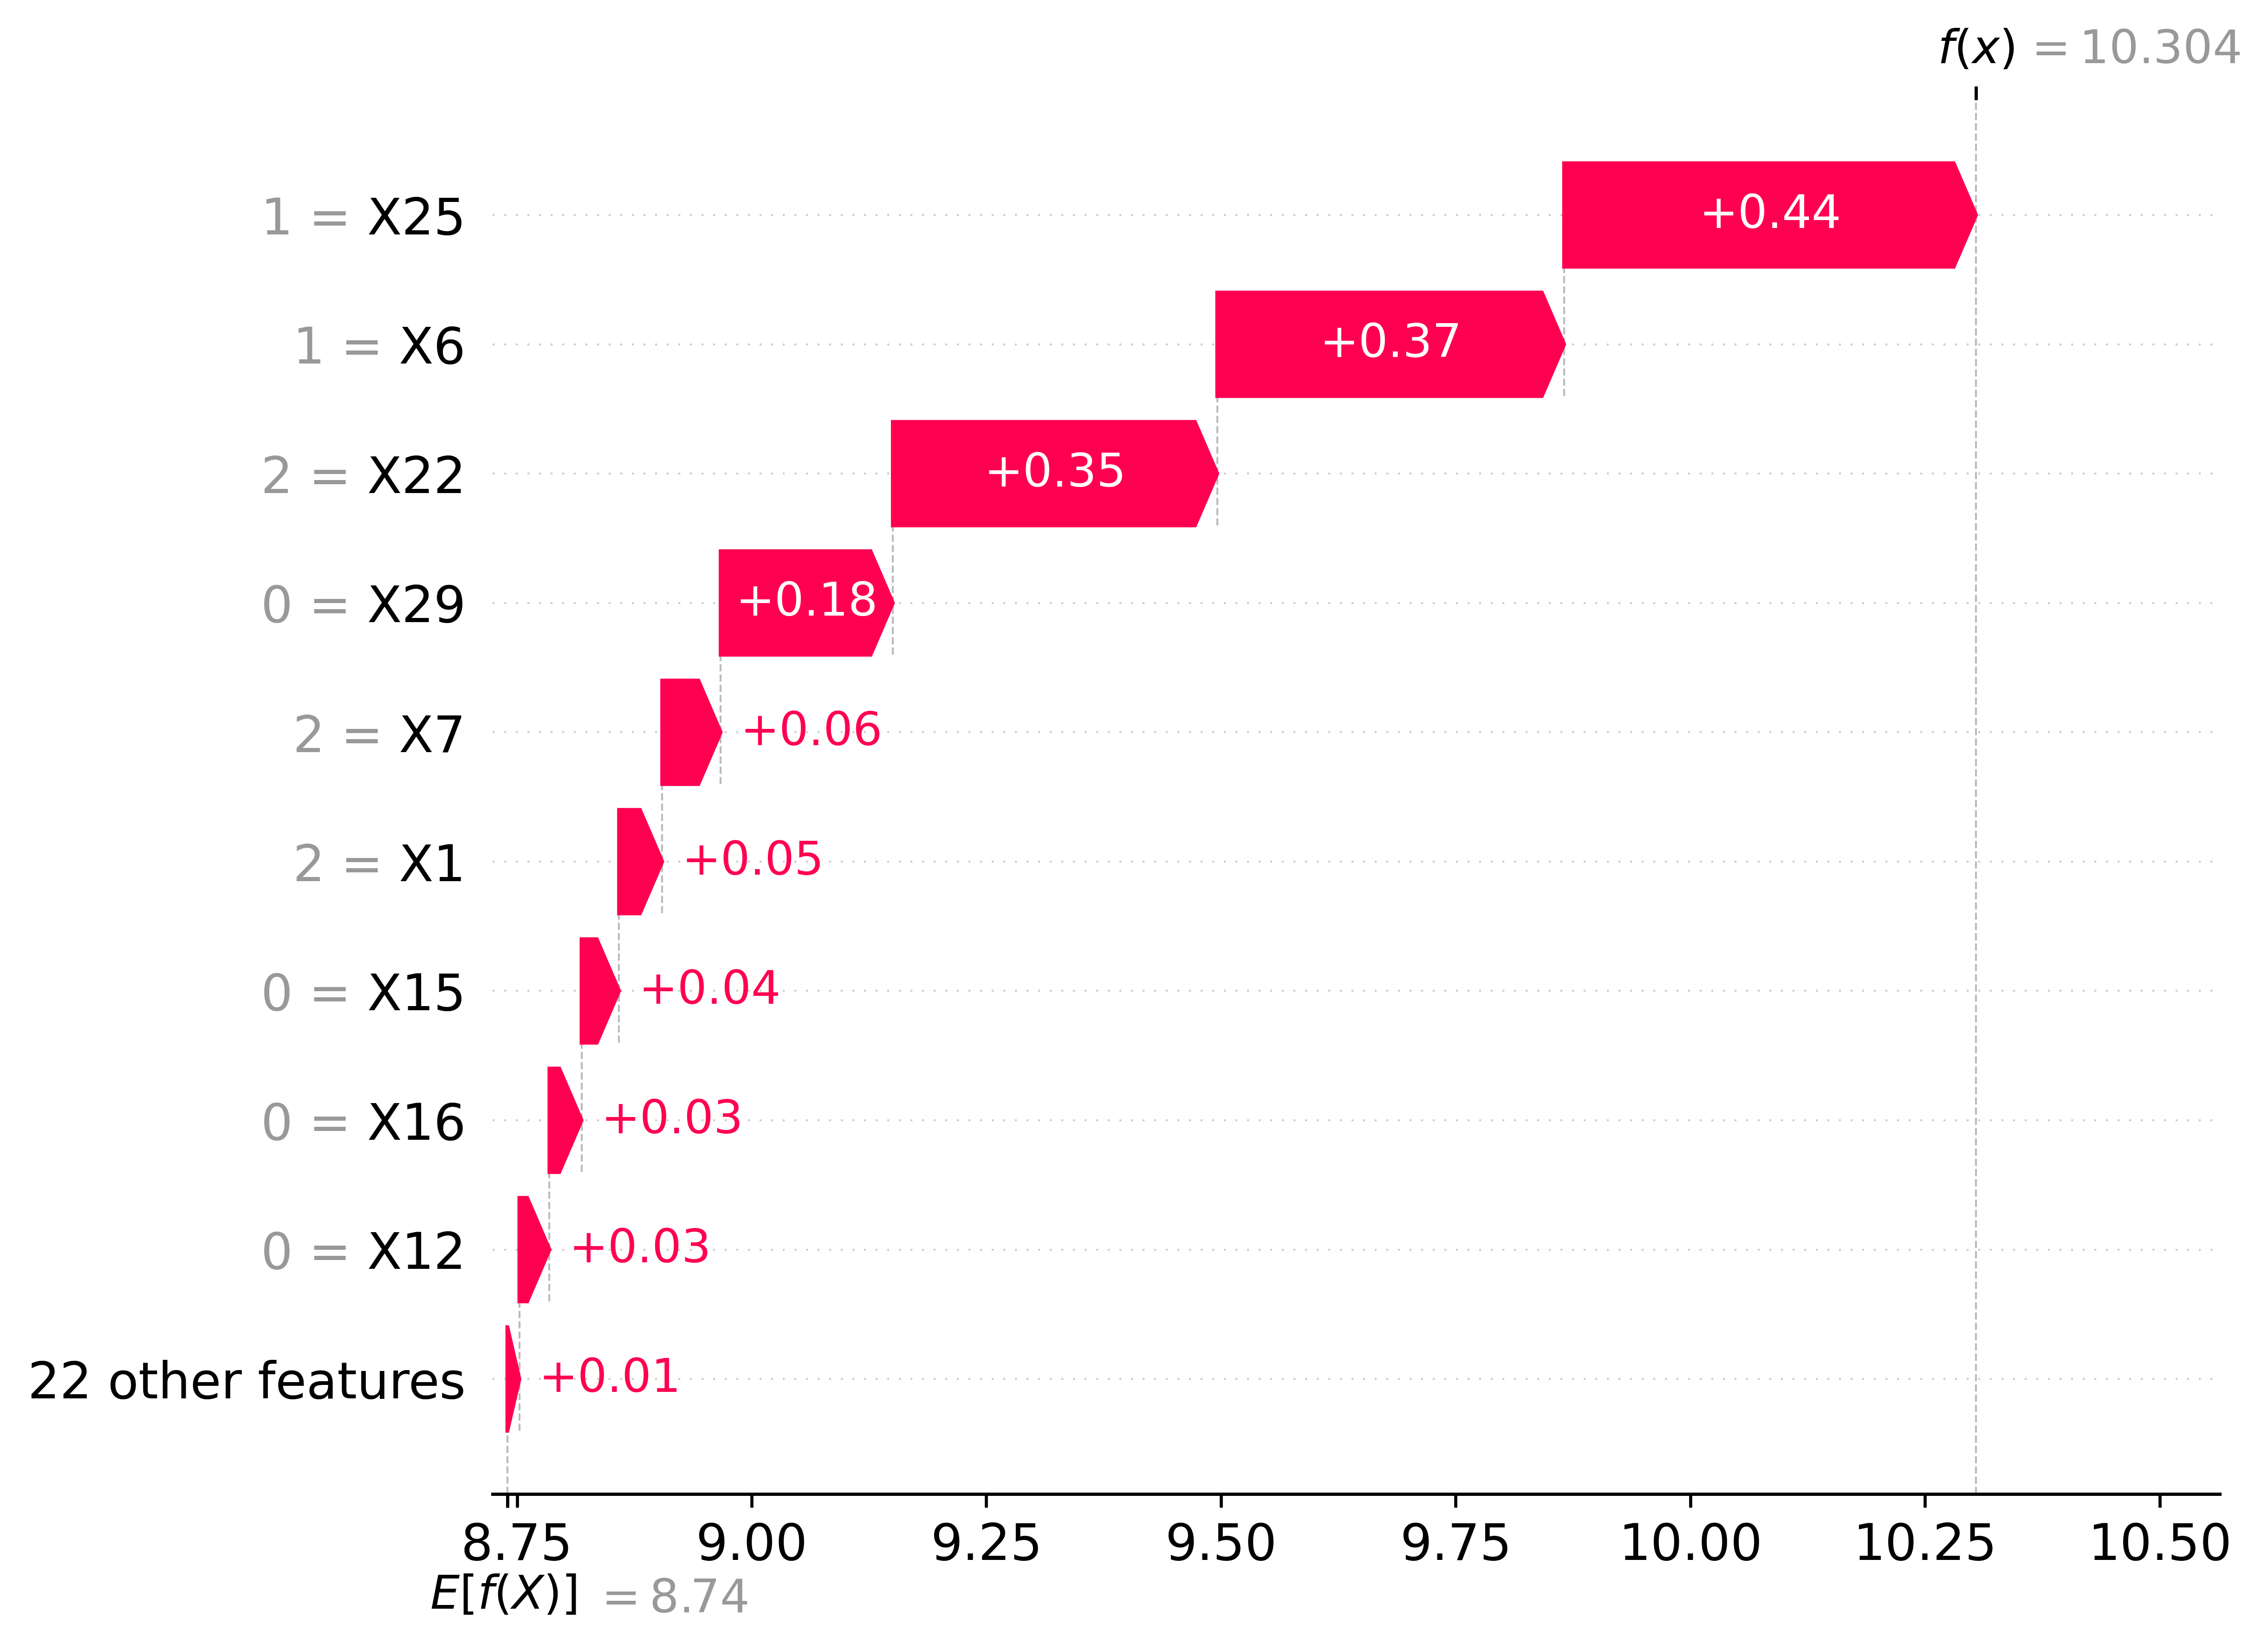

In [19]:
shap_values1 = explainer(data)

# 显示可视化图
shap.plots.waterfall(shap_values1[187])

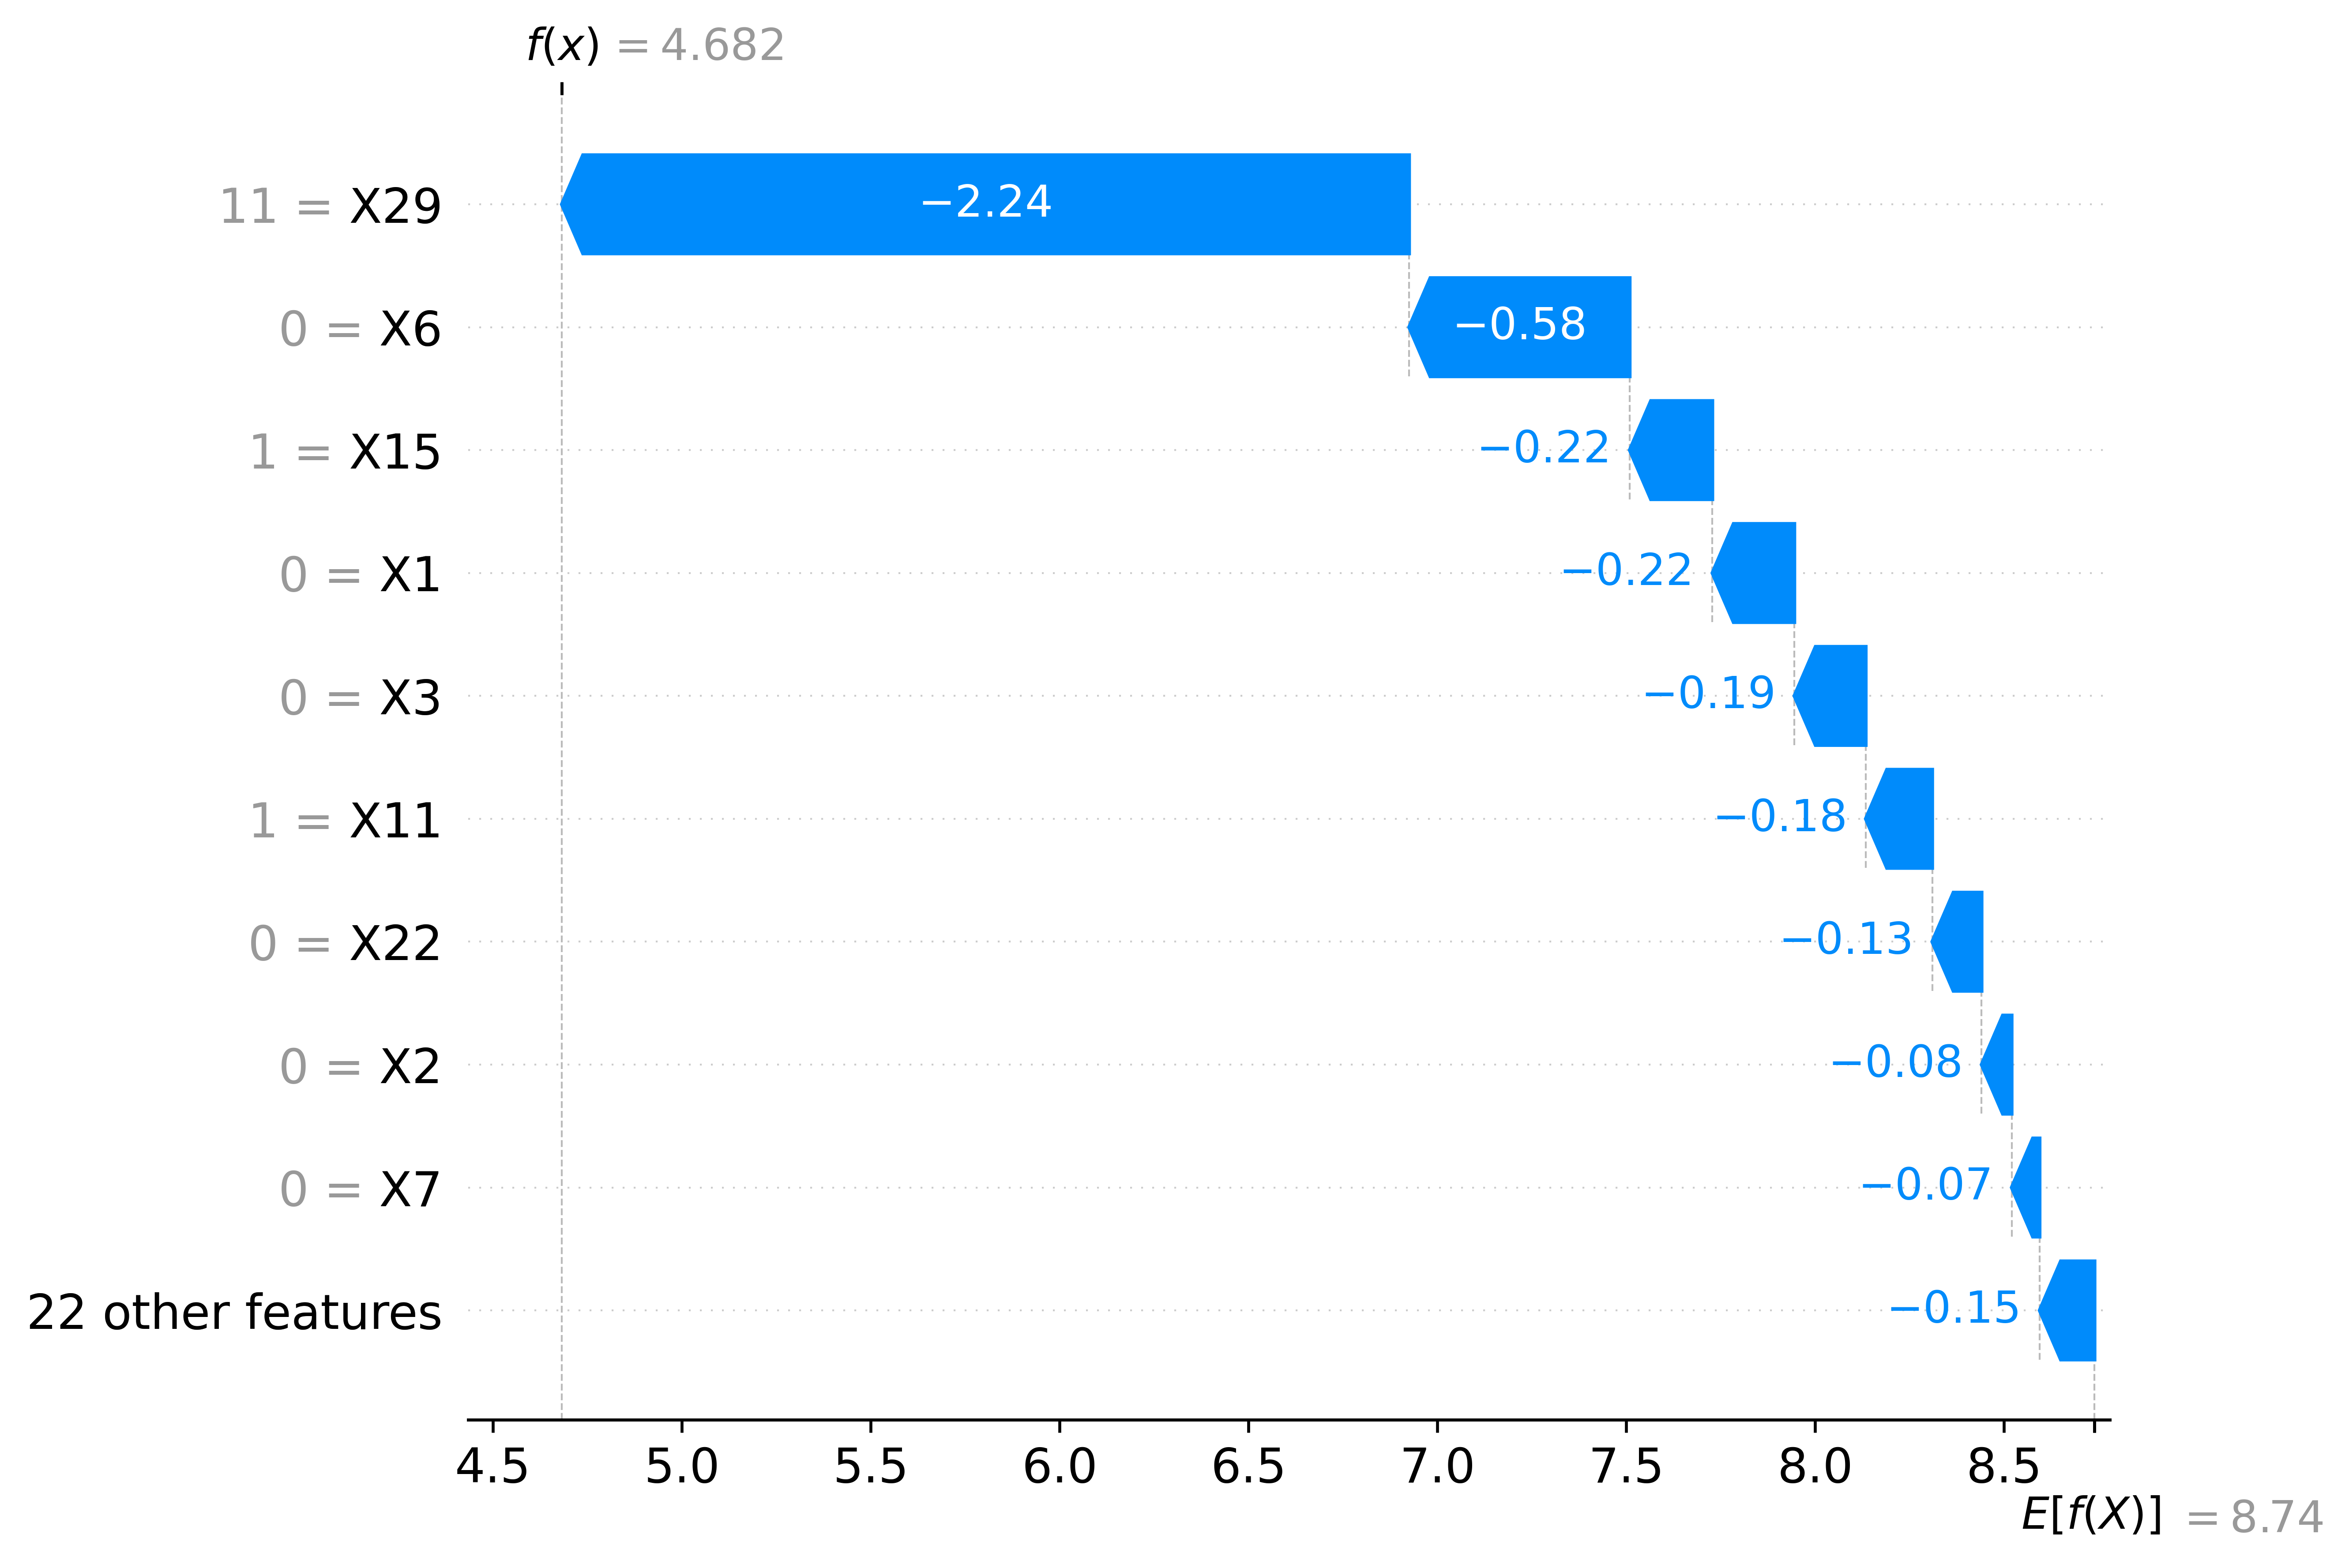

In [20]:
# 显示可视化图
shap.plots.waterfall(shap_values1[211])

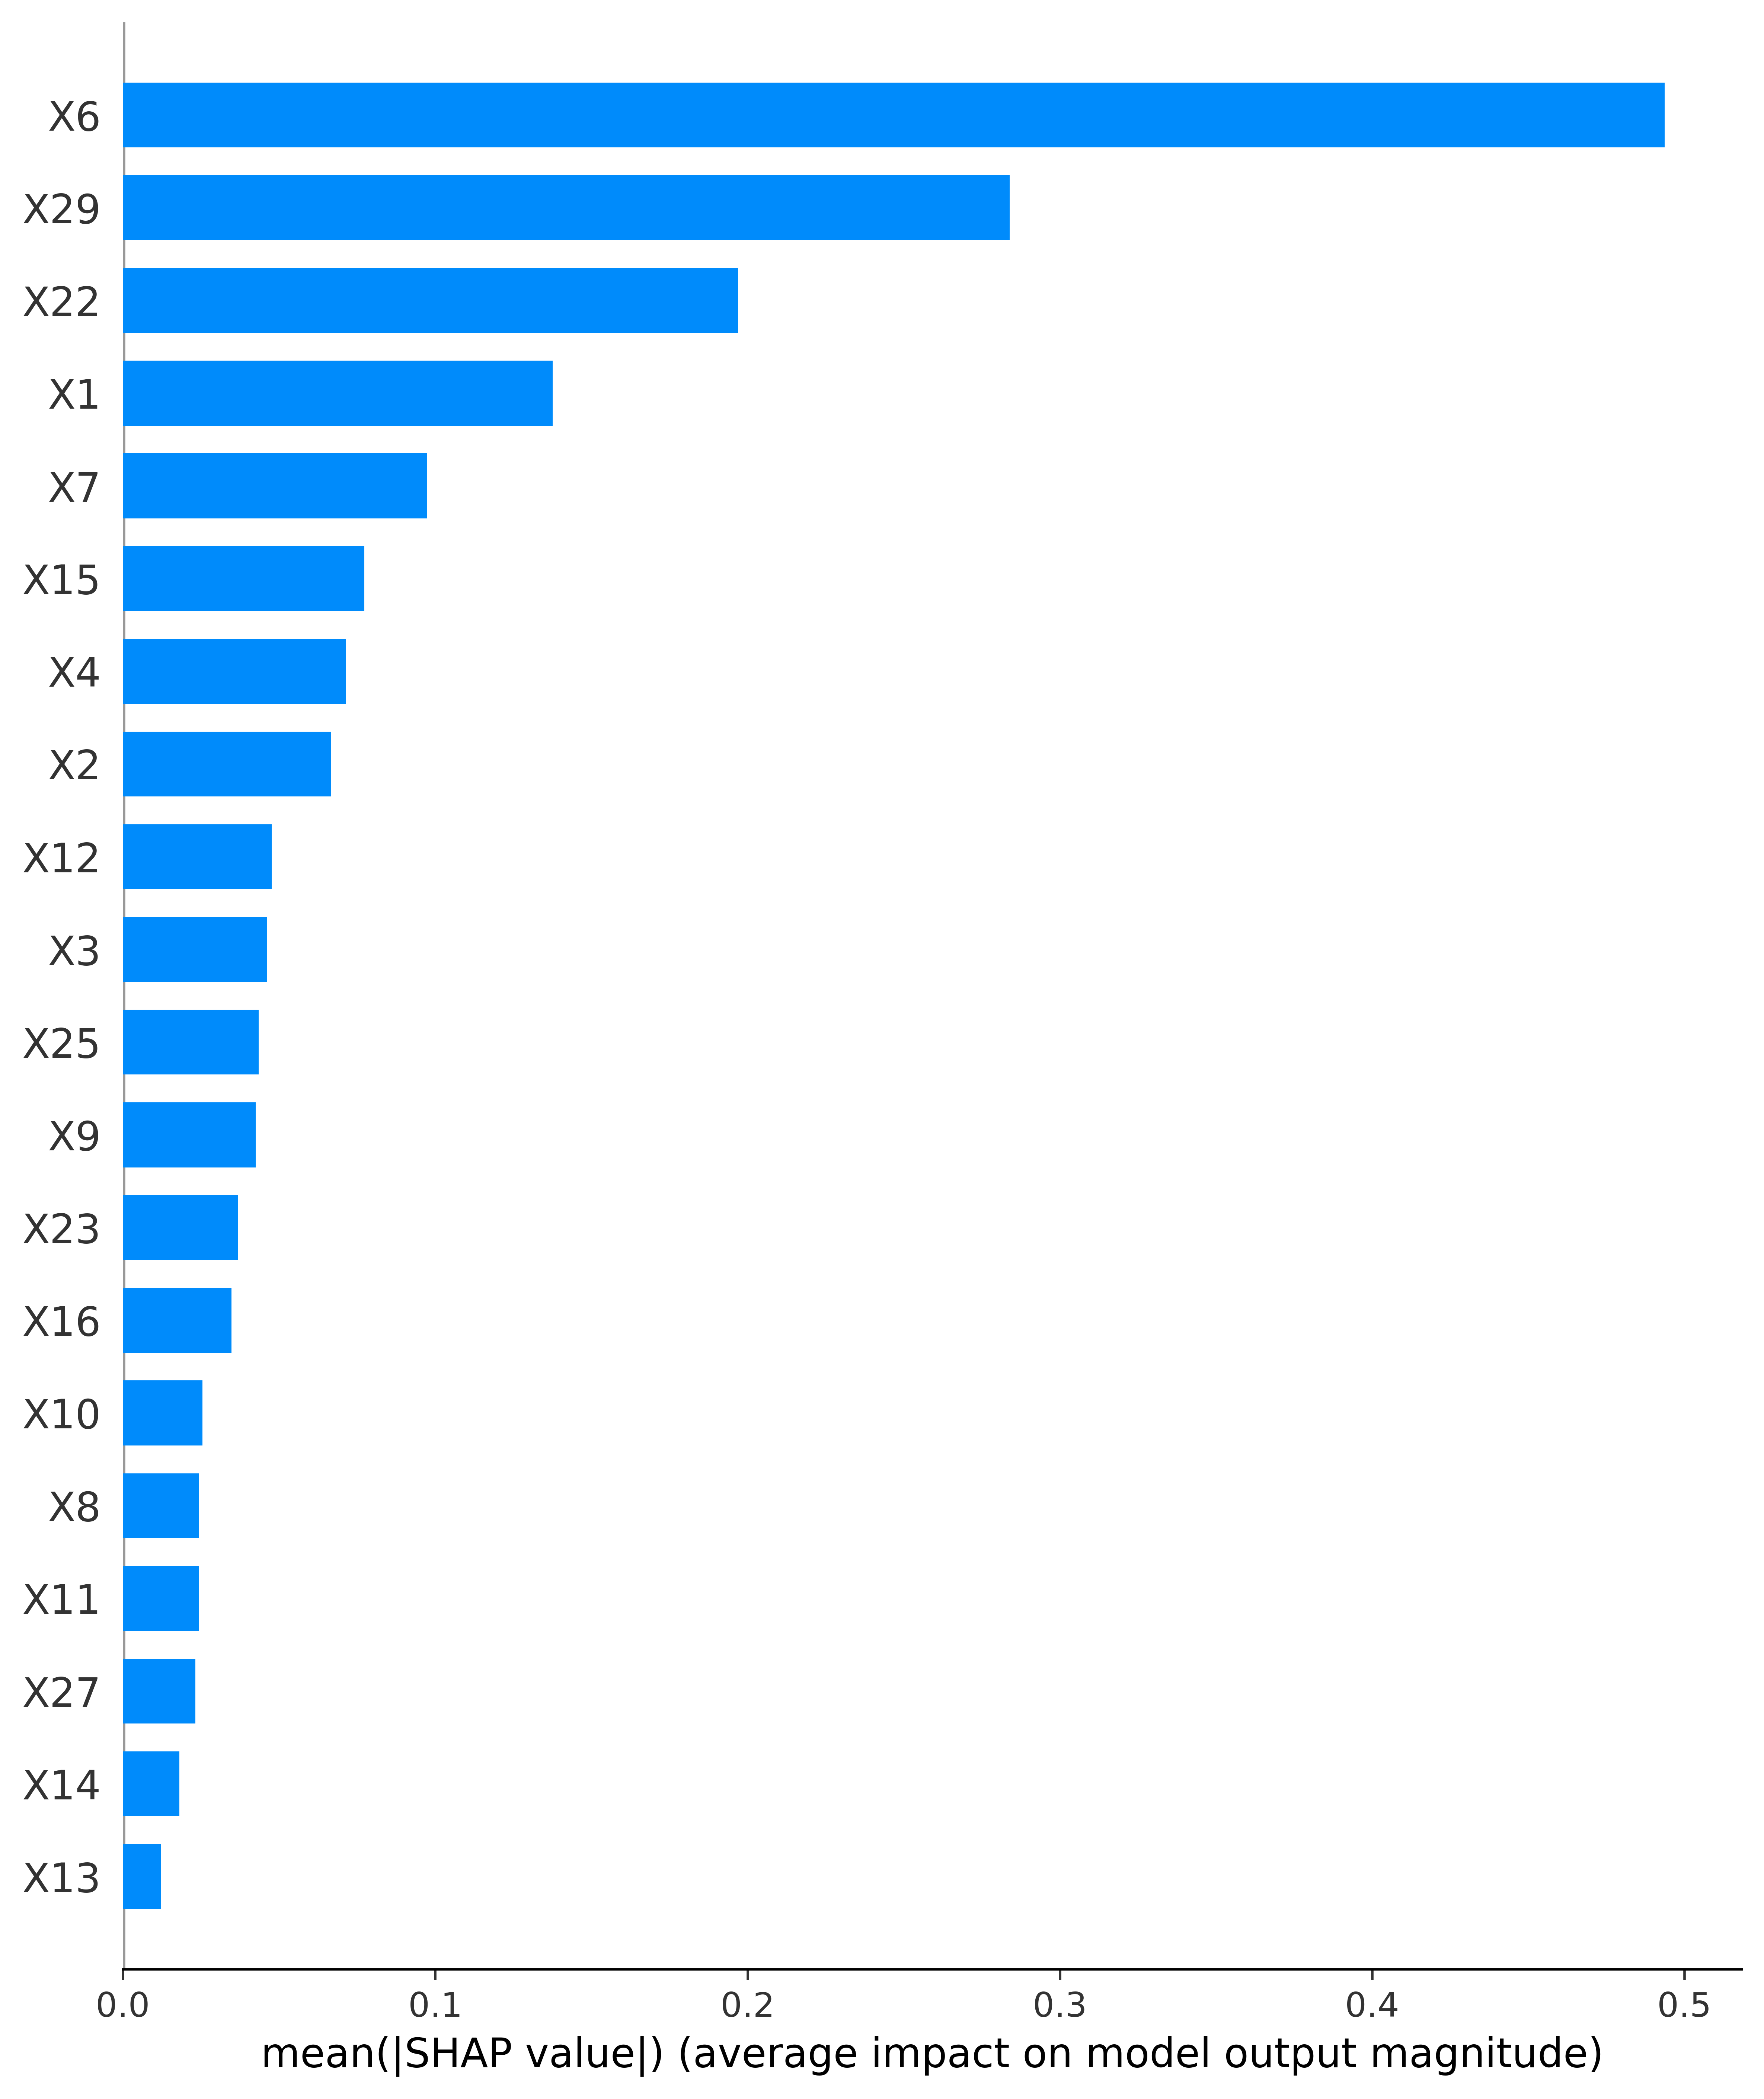

In [18]:
shap.summary_plot(shap_values,data, plot_type="bar")

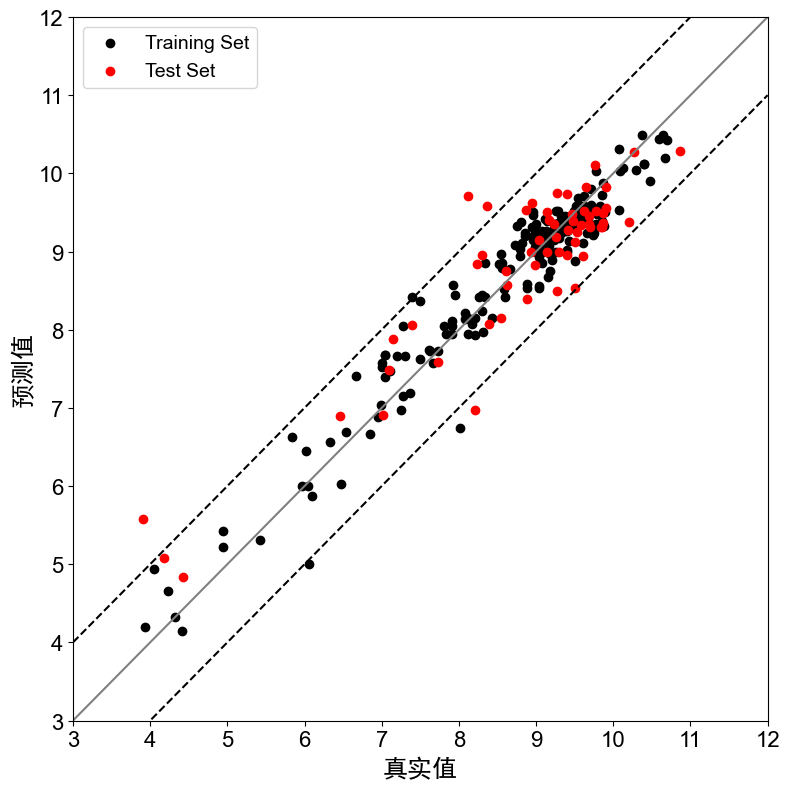

In [11]:
import matplotlib.pyplot as plt

# 绘制训练集和测试集的预测值与实际值对比图
plt.figure(figsize=(8, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
# 训练集
plt.scatter(y_train, y_train_pred, label='Training Set', color='black')

# 测试集
plt.scatter(y_test, y_test_pred, label='Test Set', color='red')

# 对角线表示完美预测的情况
plt.plot([3, 12], [3, 12], '-', color='gray')
plt.plot([3, 12], [3 - 1, 12 - 1], linestyle='--', color='black')
plt.plot([3, 12], [3 + 1, 12 + 1], linestyle='--', color='black')
plt.xlim(3, 12)
plt.ylim(3, 12)
plt.xlabel('真实值',fontsize=18)
plt.ylabel('预测值',fontsize=18)
plt.yticks(fontproperties = 'Arial', size = 16)
plt.xticks(fontproperties = 'Arial', size = 16)
bwith = 5 #边框宽度设置为2
plt.legend(prop={'family' : 'Arial', 'size'   : 14})
#plt.rcParams['font.family'] = ['Arial']
plt.tight_layout()
plt.show()
